In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df=pd.read_csv("./../data/acetylcholinesterase_activity_data_pubchem.csv")
print(df.shape)
df.head()

(6157, 882)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


In [5]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows containing `NaN`
df.dropna(inplace=True)

In [6]:
data_X=df.iloc[:,:-1]
print(data_X.shape)
data_Y= df["pIC50"]
print(data_Y.shape)

(6156, 881)
(6156,)


In [7]:
data_X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
data_X = selection.fit_transform(data_X)

In [9]:
data_X.shape

(6156, 144)

In [10]:
X_train, X_test, Y_train, Y_test= train_test_split(data_X, data_Y, test_size=0.3)
print(X_train.shape, X_test.shape)

(4309, 144) (1847, 144)


In [11]:
model= RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2_score= model.score(X_test, Y_test)
print(r2_score)

0.1394511380003821


In [12]:
Y_pred=model.predict(X_test)

/N/soft/rhel7/python/gnu/3.10.5/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

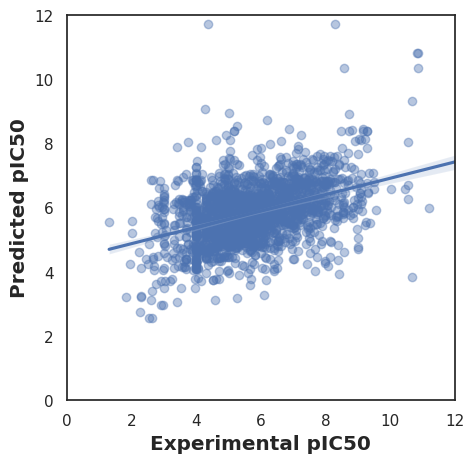

In [13]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [14]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [15]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'XGBoost': XGBRegressor()
}

# Initialize variables to store the results
train_errors = {}
test_errors = {}
train_r2 = {}
test_r2 = {}

# Fit each model and make predictions
for name, model in models.items():
    # Fit the model
    model.fit(X_train, Y_train)
    
    # Make predictions on the training set
    train_predictions = model.predict(X_train)
    
    # Evaluate on the training set
    train_error = mean_squared_error(Y_train, train_predictions)
    train_errors[name] = train_error
    
    train_r2_value = r2_score(Y_train, train_predictions)
    train_r2[name] = train_r2_value
    
    # Make predictions on the test set
    test_predictions = model.predict(X_test)
    
    # Evaluate on the test set
    test_error = mean_squared_error(Y_test, test_predictions)
    test_errors[name] = test_error
    
    test_r2_value = r2_score(Y_test, test_predictions)
    test_r2[name] = test_r2_value

# Print the results
print("Training Errors:")
for name, error in train_errors.items():
    print(f"{name}: {error}")

print("\nTest Errors:")
for name, error in test_errors.items():
    print(f"{name}: {error}")

print("\nTraining R2 Scores:")
for name, score in train_r2.items():
    print(f"{name}: {score}")

print("\nTest R2 Scores:")
for name, score in test_r2.items():
    print(f"{name}: {score}")

Training Errors:
Linear Regression: 2.141641257181781
Ridge: 2.1446276853382815
Lasso: 2.435750474438626
Random Forest: 0.7250765809870997
Gradient Boosting: 1.9579385603127442
Support Vector Regression: 1.7855612700663612
XGBoost: 0.7900408414689634

Test Errors:
Linear Regression: 2.403752973051311
Ridge: 2.393742424704562
Lasso: 2.5009219279177506
Random Forest: 2.1495672359079716
Gradient Boosting: 2.235654783651291
Support Vector Regression: 2.1757284903266396
XGBoost: 2.2333331144385102

Training R2 Scores:
Linear Regression: 0.12074685824484088
Ridge: 0.11952077692500107
Lasso: 0.0
Random Forest: 0.7023190229885061
Gradient Boosting: 0.19616619975656757
Support Vector Regression: 0.2669358832916231
XGBoost: 0.6756478753633226

Test R2 Scores:
Linear Regression: 0.03439171576730804
Ridge: 0.03841303930666595
Lasso: -0.004641890780940017
Random Forest: 0.1365003168885942
Gradient Boosting: 0.10191820707857246
Support Vector Regression: 0.12599111553729303
XGBoost: 0.10285084160892

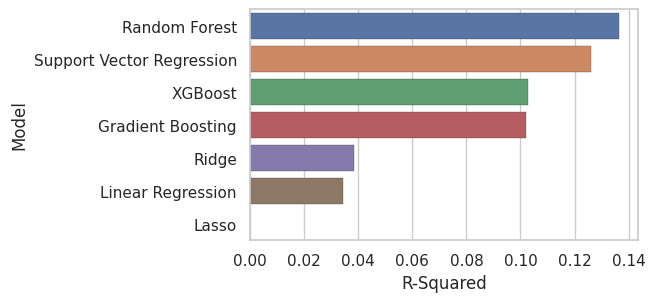

In [23]:
# Create a DataFrame to hold the R-squared values
r2_df = pd.DataFrame(list(test_r2.items()), columns=['Model', 'R-Squared'])

# Sort the DataFrame based on the R-squared values
r2_df = r2_df.sort_values('R-Squared', ascending=False)

# Ensure all R-squared values are between 0 and 1
r2_df["R-Squared"] = r2_df["R-Squared"].apply(lambda x: 0 if x < 0 else x)

# Create the bar plot
plt.figure(figsize=(5, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y='Model', x='R-Squared', data=r2_df, linewidth=0.2, edgecolor=".2")
# ax.set(xlim=(0, 1))

# Show the plot
plt.show()

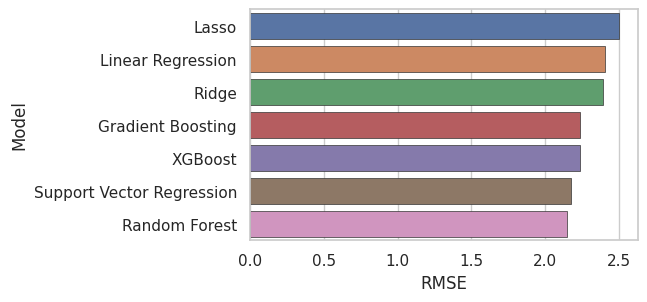

In [25]:
# Assuming predictions_train is your DataFrame
rmse_df = pd.DataFrame(list(test_errors.items()), columns=['Model', 'RMSE'])

# Sort the DataFrame based on the RMSE values
rmse_df = rmse_df.sort_values('RMSE', ascending=False)
plt.figure(figsize=(5, 3))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="Model", x="RMSE", data=rmse_df, linewidth=0.5, edgecolor=".2")


# Show the plot
plt.show()